<a href="https://colab.research.google.com/github/gowthami-08/-Linear-Regression/blob/main/ElavtaeLabs_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Checking for null values:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Checking for duplicate rows:
0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 ent

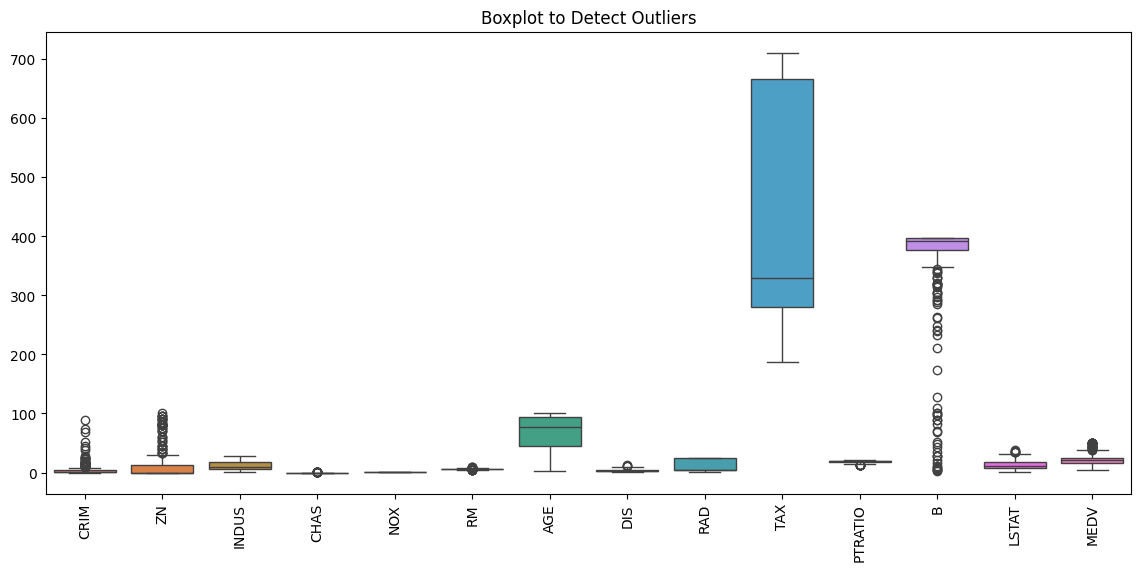


Selected Feature for Simple Linear Regression (X_simple):
      RM
0  6.575
1  6.421
2  7.185
3  6.998
5  6.430

Selected Features for Multiple Linear Regression (X_multiple):
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
5  394.12   5.21  

Target Variable (y):
0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64


In [34]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building later
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load the Dataset
df = pd.read_csv('HousingData.csv')

# 3. View First Few Rows
print("First 5 rows of the dataset:")
print(df.head())

# 4. Check for Null Values
print("\nChecking for null values:")
print(df.isnull().sum())

# 5. Check for Duplicates
print("\nChecking for duplicate rows:")
print(df.duplicated().sum())

# 6. Basic Info About Dataset
print("\nDataset Info:")
print(df.info())

# 7. Statistical Summary
print("\nStatistical Summary:")
print(df.describe())

# 8. Handling Missing Values (if any)
# If missing values found, you can either drop or fill
# Example: Dropping rows with missing values
df = df.dropna()

# 9. Detect Outliers (Optional but good practice)
# Using boxplots to visualize outliers
plt.figure(figsize=(14,6))
sns.boxplot(data=df)
plt.title('Boxplot to Detect Outliers')
plt.xticks(rotation=90)
plt.show()

# 10. Selecting Features and Target

# Target variable (y)
y = df['MEDV']

# For Simple Linear Regression - Choosing one feature, e.g., 'RM' (average number of rooms)
X_simple = df[['RM']]

# For Multiple Linear Regression - Using all features except 'MEDV'
X_multiple = df.drop(columns=['MEDV'])

# 11. Print Feature Selection
print("\nSelected Feature for Simple Linear Regression (X_simple):")
print(X_simple.head())

print("\nSelected Features for Multiple Linear Regression (X_multiple):")
print(X_multiple.head())

print("\nTarget Variable (y):")
print(y.head())


In [36]:
from sklearn.model_selection import train_test_split

# Assuming you want to use X_multiple for Multiple Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# If you want to use X_simple for Simple Linear Regression, replace X_multiple with X_simple
# X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
y_pred = model.predict(X_test)


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 3.3679832251542403
MSE: 31.45404766495083
R2 Score: 0.6270849941673196


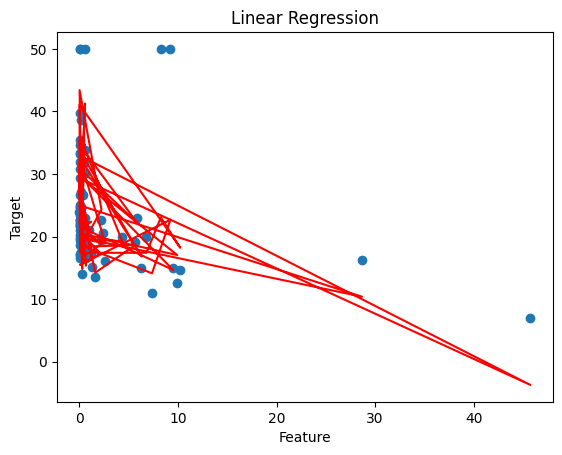

In [41]:
plt.scatter(X_test.iloc[:, 0], y_test) # Select the first column of X_test
plt.plot(X_test.iloc[:, 0], y_pred, color='red') # Select the first column of X_test
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.show()

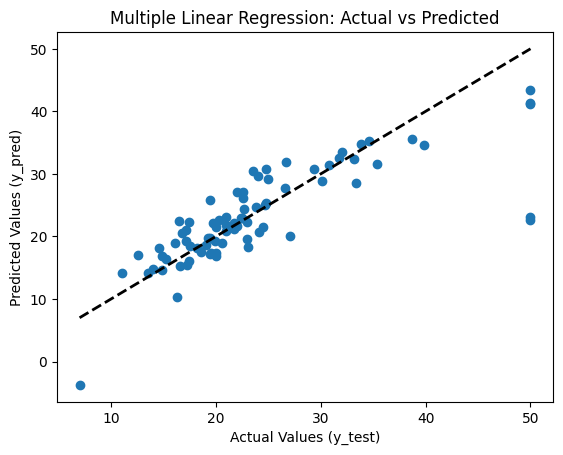

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line for reference
plt.show()

In [43]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-1.12187394e-01  4.24404148e-02  2.56728238e-02  1.98383708e+00
 -1.70792571e+01  4.25809072e+00 -2.17413906e-02 -1.42418883e+00
  2.35587949e-01 -1.19971379e-02 -9.75834850e-01  9.59377961e-03
 -3.88619588e-01]
Intercept: 33.65240504056528
